#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03B Comparing hotel prices in Europe: Vienna vs. London**

using the hotels-europe dataset

version 0.9.0 2025-08-14

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/hotels-europe/clean/"
data_out = dirname + "da_case_studies/ch03-hotels-europe-compare/"
output = dirname + "da_case_studies/ch03-hotels-europe-compare/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
import py_helper_functions as da
sns.set_theme(rc=da.da_theme, palette=da.color)

#### Load in clean and tidy data and create workfile

In [4]:
hotels_europe_price = pd.read_csv(data_in + "hotels-europe_price.csv")
#hotels_europe_price = pd.read_csv("https://osf.io/download/p6tyr/")
hotels_europe_features = pd.read_csv(data_in + "hotels-europe_features.csv")
#hotels_europe_features = pd.read_csv("https://osf.io/download/utwjs/")


### 🕵️‍♀️ Bellonda's Logic Decoder
**The Business Goal:** Construct a single "Master Analytical Table" by joining price history with hotel attributes, then immediately release computer memory by destroying the partial datasets.

**The Syntax Anatomy:**
* `hotels_europe` → **The Result** (Our new Master Table).
* `pd.merge(...)` → **The Joiner** (SQL-style database join).
* `how="left"` → **The Strategy** (Keep ALL rows from the Price table; only add Features if they match).
* `del` → **The Cleanup** (Removes the variable name from the namespace so Python can free up RAM).

> **💡 The Wisdom Check:**
> "Data merging is expensive on memory because, for a moment, you hold three copies of the data (Left, Right, and Result). The `del` commands are essential hygiene in big data projects to prevent your notebook from crashing."

In [5]:
hotels_europe = pd.merge(
    hotels_europe_price, hotels_europe_features, how="left", on="hotel_id"
)
del hotels_europe_price
del hotels_europe_features

#### Filter for same Vienna data we used + London same date

In [6]:
hotels_europe_cut = hotels_europe.loc[
    (hotels_europe["year"] == 2017)
    & (hotels_europe["month"] == 11)
    & (hotels_europe["weekend"] == 0)
    & (hotels_europe["city"].isin(["Vienna", "London"]))
    & (hotels_europe["accommodation_type"] == "Hotel")
    & (hotels_europe["stars"] >= 3)
    & (hotels_europe["stars"] <= 4)
    & (hotels_europe["stars"].notna())
    & (hotels_europe["city_actual"].isin(["Vienna", "London"]))
    & (hotels_europe["price"] <= 600)
]

In [6]:
hotels_europe_cut = hotels_europe.loc[
    (hotels_europe["year"] == 2017)
    & (hotels_europe["month"] == 11)
    & (hotels_europe["weekend"] == 0)
    & (hotels_europe["city"].isin(["Vienna", "London"]))
    & (hotels_europe["accommodation_type"] == "Hotel")
    & (hotels_europe["stars"] >= 3)
    & (hotels_europe["stars"] <= 4)
    & (hotels_europe["stars"].notna())
    & (hotels_europe["city_actual"].isin(["Vienna", "London"]))
    & (hotels_europe["price"] <= 600)
]

In [7]:
hotels_europe_cut.price.max()

491

### 🕵️‍♀️ Bellonda's Logic Decoder
**The Business Goal:** Create a comparative summary table that profiles each specific city by its pricing behavior and data density.

**The Syntax Anatomy:**
* `hotels_europe_cut` → **The Subject** (Our filtered dataset of individual hotels)
* `.groupby("city")` → **The Pivot** (Organizes the data into groups based on the city name)
* `.agg(...)` → **The Calculator** (Compresses many rows into single summary numbers)
    * `mean_price=("price", "mean")` → Calculates average price per city
    * `max=("price", "max")` → Finds the most expensive hotel per city
    * `n=("price", "size")` → **Sample Size** (Counts how many hotels we have for that city)

> **💡 The Wisdom Check:**
> Always include a count (`n` or `size`) when aggregating averages. An average price of 200€ based on 2 hotels is statistically meaningless compared to an average based on 200 hotels.
### 🧠 Syntax Shortcut: Named Aggregation
When using `.agg()`, read the pattern `name=("column", "function")` like a sentence:
* **"Create a new column called `name`...**
* **...by taking the valid data from `column`...**
* **...and applying the `function` to it."**

*Example:* `n=("price", "size")` -> "Make a column `n` by checking the `size` (height) of the `price` column."

### 🧰 Bellonda's Aggregation Reference
When using `.agg()`, use these string shortcuts to tell the story of your data:

| Shortcut | Function | Business Question It Answers |
| :--- | :--- | :--- |
| `"mean"` | Average | "What does the typical customer pay?" |
| `"median"` | Median | "What is the price in the exact middle? (Ignores crazy outliers)" |
| `"min"` / `"max"` | Range | "What is the cheapest entry point and the luxury ceiling?" |
| `"std"` | Std. Deviation | "How predictable is this market? (High = volatile, Low = consistent)" |
| `"count"` | Count (Valid) | "How many usable data points do we have?" |
| `"size"` | Total Rows | "How big is the dataset overall (including errors)?" |
| `"nunique"` | Unique Count | "How much variety is there?" (e.g. number of hotel brands) |
| `"sum"` | Total | "What is the total volume/revenue?" |

> **💡 The Wisdom Check:**
> You can also pass custom functions! If you write `x = lambda x: x.max() - x.min()`, you can calculate the **Price Spread** directly inside the agg function.

In [8]:
hotels_europe_cut.groupby("city").agg(
    mean_price=("price", "mean"), max=("price", "max"), n=("price", "size")
)

,mean_price,max,n
city,,,
London,202.356322,491,435
Vienna,109.975845,383,207


### Figure 3.6 The distribution of hotel price in Vienna and London

In [7]:
hotels_vienna = hotels_europe_cut[hotels_europe_cut["city"] == "Vienna"]


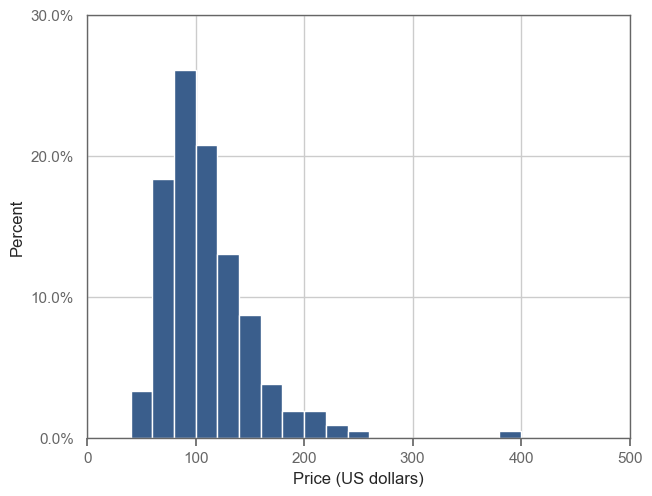

<Figure size 1000x600 with 0 Axes>

In [11]:

sns.histplot(
    data= hotels_vienna, #data we look at
    x=hotels_vienna["price"], #put price on x
    stat="probability",  
    binwidth=20,
    color=da.color[0],
    binrange=(0, 500),
    alpha = 1 
)

plt.xlabel("Price (US dollars)")
plt.ylabel("Percent")
plt.xlim(0, 500)
plt.ylim(0, 0.3)
plt.xticks(ticks=range(0, 501, 100))
plt.yticks(ticks=[0, 0.1, 0.2, 0.3])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.figure(figsize=(10, 6))
plt.show()

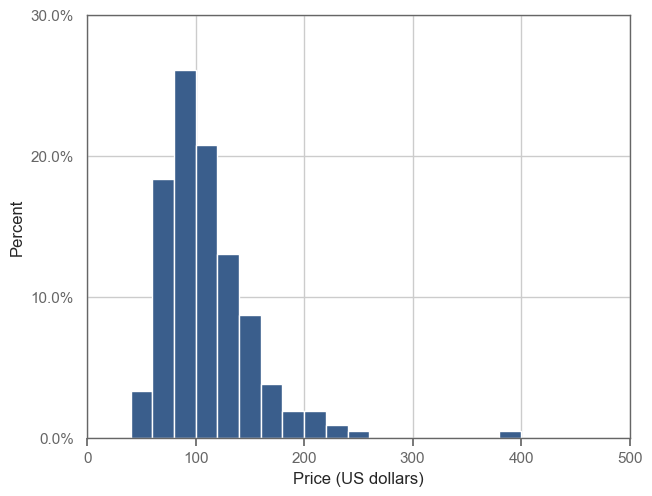

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.histplot(
    data=hotels_vienna,                 # DataFrame containing Vienna hotels data
    x=hotels_vienna["price"],           # Plot the "price" variable on the x-axis
    stat="probability",                 # Normalize counts so bar heights sum to 1 (probabilities)
    binwidth=20,                        # Use 20-USD wide bins (0–20, 20–40, ..., up to 500)
    color=da.color[0],                  # Set the bar color from your custom palette
    binrange=(0, 500),                  # Only include prices between 0 and 500 USD in the histogram
    alpha=1                             # Fully opaque bars (no transparency)
)

plt.xlabel("Price (US dollars)")        # Label x-axis with units for interpretability
plt.ylabel("Percent")                   # Label y-axis as percent (matches stat='probability')
plt.xlim(0, 500)                        # Match plot x-limits to the chosen binrange
plt.ylim(0, 0.3)                        # Show probabilities from 0 to 0.3 (0%–30%) on the y-axis
plt.xticks(ticks=range(0, 501, 100))    # Major x-ticks every 100 USD for readability
plt.yticks(ticks=[0, 0.1, 0.2, 0.3])    # Major y-ticks at 0, 10%, 20%, 30% (before formatting)
plt.gca().yaxis.set_major_formatter(
    PercentFormatter(1)                 # Convert probabilities (0–1) to displayed percentages
)

plt.figure(figsize=(10, 6))             # Creates a new (empty) figure of this size; normally should be BEFORE histplot
plt.show()                              # Render the plot

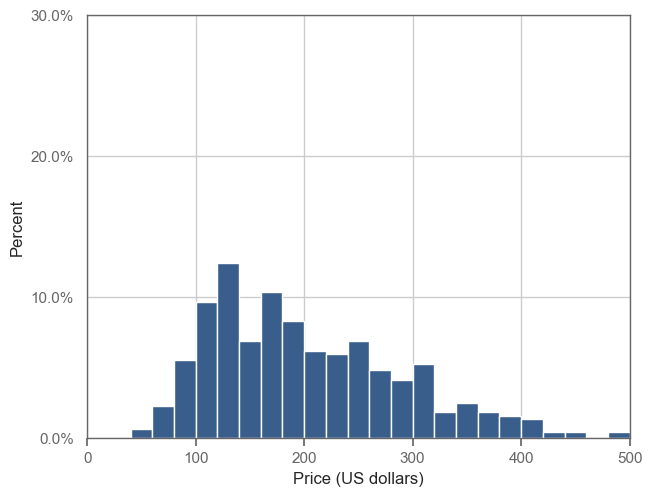

<Figure size 1000x600 with 0 Axes>

In [11]:
#London

hotels_london = hotels_europe_cut[hotels_europe_cut["city"] == "London"]

sns.histplot(
    data= hotels_london,
    x=hotels_london["price"],
    stat="probability",  
    binwidth=20,
    color=da.color[0],
    binrange=(0, 500),
    alpha = 1 
)

plt.xlabel("Price (US dollars)")
plt.ylabel("Percent")
plt.xlim(0, 500)
plt.ylim(0, 0.3)
plt.xticks(ticks=range(0, 501, 100))
plt.yticks(ticks=[0, 0.1, 0.2, 0.3])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.figure(figsize=(10, 6))
plt.show()

### Figure 3.7 Density plots of hotel prices: Vienna and London

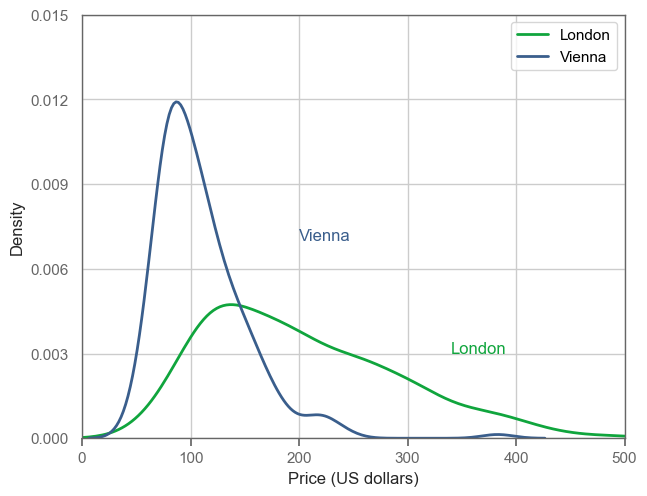

In [12]:
sns.kdeplot(
    data=hotels_europe_cut.query('city == "London"'),
    x="price",
    color=da.color[1],
    label="London",
    linewidth=2
)
sns.kdeplot(
    data=hotels_europe_cut.query('city == "Vienna"'),
    x="price",
    color=da.color[0],
    label="Vienna",
    linewidth=2
)

plt.xlim(0, 500)
plt.ylim(0, 0.015)
plt.xticks(ticks=range(0, 501, 100))
plt.yticks(ticks=[0, 0.003, 0.006, 0.009, 0.012, 0.015])
plt.text(340, 0.003, "London", color=da.color[1], fontsize=12)
plt.text(200, 0.007, "Vienna", color=da.color[0], fontsize=12)
plt.xlabel("Price (US dollars)")
plt.ylabel("Density")
plt.legend(title="", loc="upper right")
plt.show()

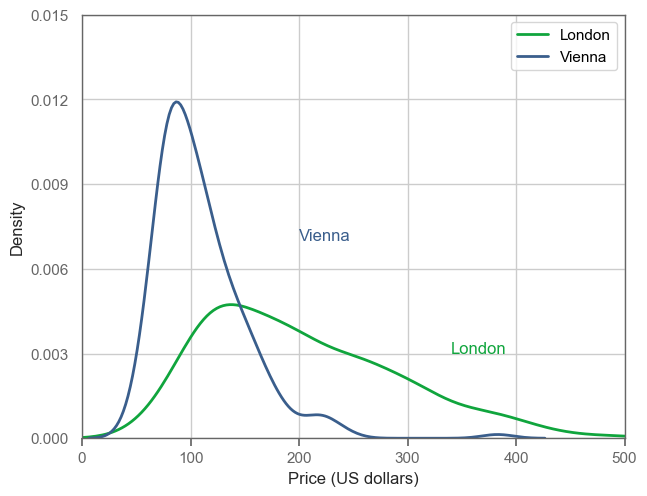

In [13]:
sns.kdeplot(
    data=hotels_europe_cut.query('city == "London"'),  # Filter rows to only London hotels
    x="price",                                         # Estimate density of the "price" variable
    color=da.color[1],                                 # Line color for London curve
    label="London",                                    # Label used in the legend
    linewidth=2                                        # Make the density line thicker / more visible
)

sns.kdeplot(
    data=hotels_europe_cut.query('city == "Vienna"'),  # Filter rows to only Vienna hotels
    x="price",                                         # Estimate density of the "price" variable
    color=da.color[0],                                 # Line color for Vienna curve
    label="Vienna",                                    # Label used in the legend
    linewidth=2                                        # Same thickness for fair comparison
)

plt.xlim(0, 500)                                      # Show prices only between 0 and 500 USD
plt.ylim(0, 0.015)                                    # Fix density axis from 0 to 0.015
plt.xticks(ticks=range(0, 501, 100))                  # X-axis ticks every 100 USD
plt.yticks(ticks=[0, 0.003, 0.006, 0.009, 0.012, 0.015])  # Y-axis ticks at regular density steps

plt.text(340, 0.003, "London",                        # Annotate near London curve
         color=da.color[1], fontsize=12)
plt.text(200, 0.007, "Vienna",                        # Annotate near Vienna curve
         color=da.color[0], fontsize=12)

plt.xlabel("Price (US dollars)")                      # Label x-axis with units
plt.ylabel("Density")                                 # Clarify that y-axis shows density, not probability
plt.legend(title="", loc="upper right")               # Show legend in the top-right without a title
plt.show()                                            # Render the plot


#### Table 3.6

In [13]:
hotels_europe_cut.groupby("city").agg(
    n=("price", "size"),
    mean=("price", np.mean),
    median=("price", np.median),
    min=("price", min),
    max=("price", max),
    sd=("price", np.std),
    skew=("price", da.skew),
)

,n,mean,median,min,max,sd,skew
city,,,,,,,
London,435,202.356322,186.0,49,491,88.128830,0.186
Vienna,207,109.975845,100.0,50,383,42.221381,0.237
